In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("E:\Intellipaat Class\Machine Learning\Case Study\Logistic Regression\Weather Training Data.csv")
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [3]:
df.shape

(99516, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [5]:
df.replace('?', np.nan, inplace = True)

In [6]:
df.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [7]:
df_float = df.select_dtypes("float")
df_float

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
3,14.6,29.7,0.2,NaN,NaN,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9
4,7.7,26.7,0.0,NaN,NaN,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,8.0,20.7,0.0,NaN,NaN,41.0,19.0,26.0,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0
99512,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9
99513,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
99514,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5


In [8]:
df_integer = df.select_dtypes("int")
df_integer

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
99511,0
99512,0
99513,0
99514,0


In [9]:
df_object = df.select_dtypes("object")
df_object

,row ID,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Row0,Albury,W,W,WNW,No
1,Row1,Albury,WNW,NNW,WSW,No
2,Row2,Albury,W,ENE,NW,No
3,Row3,Albury,WNW,W,W,No
4,Row4,Albury,W,SSE,W,No
...,...,...,...,...,...,...
99511,Row101816,Uluru,ESE,SE,E,No
99512,Row101817,Uluru,E,ESE,E,No
99513,Row101818,Uluru,E,SE,ENE,No
99514,Row101819,Uluru,NNW,SE,N,No


In [10]:
df.drop('row ID',axis=1, inplace = True)

In [11]:
df_object = df.select_dtypes("object")
df_object

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,W,ENE,NW,No
3,Albury,WNW,W,W,No
4,Albury,W,SSE,W,No
...,...,...,...,...,...
99511,Uluru,ESE,SE,E,No
99512,Uluru,E,ESE,E,No
99513,Uluru,E,SE,ENE,No
99514,Uluru,NNW,SE,N,No


In [12]:
df_object.nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [13]:
df_object.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lr = LabelEncoder()

In [16]:
df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']] = lr.fit_transform(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [17]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,NaN,NaN,4,44.0,3,2,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,1,0
1,0,7.4,25.1,0.0,NaN,NaN,4,44.0,3,2,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,1,0
2,0,17.5,32.3,1.0,NaN,NaN,4,41.0,3,2,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,1,0
3,0,14.6,29.7,0.2,NaN,NaN,4,56.0,3,2,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,1,0
4,0,7.7,26.7,0.0,NaN,NaN,4,35.0,3,2,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,1,0


In [18]:
df.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir          0
WindGustSpeed     6480
WindDir9am           0
WindDir3pm           0
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday            0
RainTomorrow         0
dtype: int64

In [19]:
df.fillna(df.mean(), inplace = True)

In [20]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [21]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,5.46132,7.61509,4,44.0,3,2,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,1,0
1,0,7.4,25.1,0.0,5.46132,7.61509,4,44.0,3,2,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,1,0
2,0,17.5,32.3,1.0,5.46132,7.61509,4,41.0,3,2,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,1,0
3,0,14.6,29.7,0.2,5.46132,7.61509,4,56.0,3,2,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,1,0
4,0,7.7,26.7,0.0,5.46132,7.61509,4,35.0,3,2,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0,8.0,20.7,0.0,5.46132,7.61509,4,41.0,3,2,...,56.0,32.0,1028.1,1024.3,4.447985,7.000000,11.6,20.0,1,0
99512,0,3.5,21.8,0.0,5.46132,7.61509,4,31.0,3,2,...,59.0,27.0,1024.7,1021.2,4.447985,4.519122,9.4,20.9,1,0
99513,0,2.8,23.4,0.0,5.46132,7.61509,4,31.0,3,2,...,51.0,24.0,1024.6,1020.3,4.447985,4.519122,10.1,22.4,1,0
99514,0,3.6,25.3,0.0,5.46132,7.61509,4,22.0,3,2,...,56.0,21.0,1023.5,1019.1,4.447985,4.519122,10.9,24.5,1,0


In [22]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [24]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
Logreg = LogisticRegression()

In [29]:
Logreg.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = Logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
accuracy = accuracy_score(y_test, y_pred)

In [33]:
accuracy

0.8379835873388042

In [34]:
confusion_matrix(y_test, y_pred)

array([[21917,  1250],
       [ 3587,  3101]], dtype=int64)

[0.         0.         0.         ... 0.98105063 0.98105063 1.        ] [0.00000000e+00 1.49521531e-04 4.48564593e-04 ... 9.99850478e-01
 1.00000000e+00 1.00000000e+00] [1.99999801e+00 9.99998013e-01 9.99739313e-01 ... 6.97371799e-03
 6.97155522e-03 1.92868525e-03]


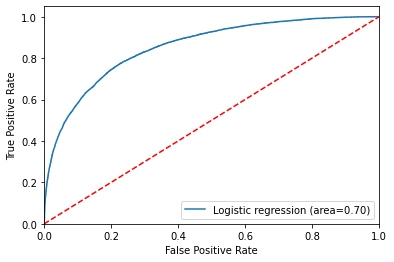

In [64]:
from sklearn.metrics import roc_auc_score
ras = roc_auc_score(y_test, y_pred)
ras
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, Logreg.predict_proba(X_test)[:,1])
print(fpr, tpr, tresholds)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='Logistic regression (area=%0.2f)' % ras)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

[0.         0.05395606 1.        ] [0.         0.46366627 1.        ] [2 1 0]


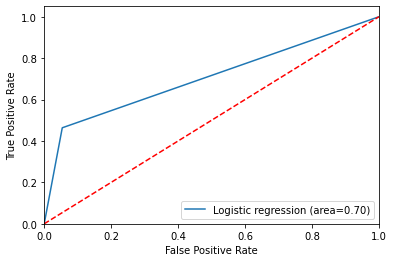

In [72]:
from sklearn.metrics import roc_auc_score
ras = roc_auc_score(y_test, y_pred)
ras
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, tresholds)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='Logistic regression (area=%0.2f)' % ras)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()